In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import json 
from market_data import MarketDataYFinance
import datetime as dt

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

def get_sp500(url):
    tables = pd.read_html(url)
    df = tables[0]
    return df

aapl = MarketDataYFinance(tic='TSLA', delta=100)
print(aapl.start, aapl.stop)

aapl_prccd = aapl.price_df()
aapl_prccd.head()

2023-09-13 2023-12-22
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,1D_Return,1D_Log_Return,Cum_Return,Ann_Vol
Date,,,,,,,,,,
2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700,NaN,NaN,NaN,NaN
2023-09-14,271.320007,276.709991,270.420013,276.040009,276.040009,107709800,0.017472,0.017321,1.017472,NaN
2023-09-15,277.549988,278.980011,271.000000,274.390015,274.390015,133422800,-0.005977,-0.005995,1.011390,NaN
2023-09-18,271.160004,271.440002,263.760010,265.279999,265.279999,101543300,-0.033201,-0.033765,0.977811,NaN
2023-09-19,264.350006,267.850006,261.200012,266.500000,266.500000,103704000,0.004599,0.004588,0.982307,NaN


<Axes: xlabel='Date'>

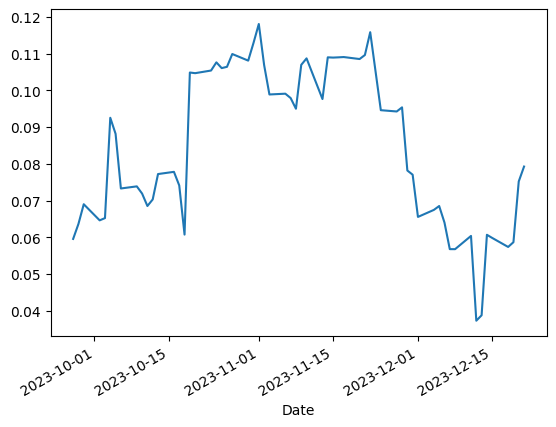

In [3]:
vol = aapl_prccd['1D_Return'].rolling(10).std() * np.sqrt(10)
vol.plot()

In [6]:
tsla = MarketDataYFinance(tic = 'TSLA',
                        fixed = False,
                        start ='2010-01-01',
                        stop = '2023-01-01')
tsla.price_df()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,1D_Return,1D_Log_Return,Cum_Return,Ann_Vol
Date,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,-0.002511,-0.002515,0.997489,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,-0.078473,-0.081723,0.919213,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,-0.125683,-0.134312,0.803683,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,-0.160937,-0.175470,0.674341,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,-0.017707,77.323133,0.653782
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,-0.121138,68.501450,0.663490
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,0.032553,70.768089,0.664540
